<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="in_class.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Inclass - Lab <br>(Session 5)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

### About the data set (Employee data)

The dataset contains information about employees. The aim is to find which employees might undergo attrition.<br> Attribute information: 

**Age:** Age of the employee 

**BusinessTravel:** How much travel is involved in the job for the employee:No Travel, Travel Frequently, Tavel Rarely

**Department:** Department of the employee: Human Resources, Reserach & Development, Sales

**Commute:** Number of miles of daily commute for the employee

**Education:** Employee education field: Human Resources, Life Sciences, Marketing, Medical Sciences, Technical, Others

**EnvironmentSatisfaction:** Satisfaction of employee with office environment

**Gender:** Employee gender

**JobInvolvement:** Job involvement rating

**JobLevel:**  Job level for employee designation

**JobSatisfaction:** Employee job satisfaction rating

**MonthlyIncome:** Employee monthly salary

**OverTime:** Has the employee been open to working overtime: Yes or No

**PercentSalaryHike:** Percent increase in salary

**PerformanceRating:** Overall employee performance rating

**YearsAtCompany:** Number of years the employee has worked with the company

**Attrition:** Employee leaving the company: Yes or No

## Table of Content

1. **[Decision tree](#dtree)**
2. **[Random forest](#rf)**

**Import the required libraries**

In [179]:
# type your code here
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree

from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score, plot_roc_curve, make_scorer
from sklearn.model_selection import cross_val_predict, KFold


In [238]:
def remove_outliers(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    
    return df

#### Load the csv file

In [181]:
# load the csv file
df_employee = pd.read_csv('Employee-Attrition.csv')

# display the first two observations
df_employee.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,YearsAtCompany
0,41,Yes,Travel_Rarely,Sales,1,Life Sciences,2,Female,3,2,Sales Executive,4,5993,8,Yes,11,3,6
1,49,No,Travel_Frequently,Research & Development,8,Life Sciences,3,Male,2,2,Research Scientist,2,5130,1,No,23,4,10
2,37,Yes,Travel_Rarely,Research & Development,2,Other,4,Male,2,1,Laboratory Technician,3,2090,6,Yes,15,3,0
3,33,No,Travel_Frequently,Research & Development,3,Life Sciences,4,Female,3,1,Research Scientist,3,2909,1,Yes,11,3,8
4,27,No,Travel_Rarely,Research & Development,2,Medical,1,Male,3,1,Laboratory Technician,2,3468,9,No,12,3,2


In [182]:
df_employee.isnull().sum()

Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
EducationField             0
EnvironmentSatisfaction    0
Gender                     0
JobInvolvement             0
JobLevel                   0
JobRole                    0
JobSatisfaction            0
MonthlyIncome              0
NumCompaniesWorked         0
OverTime                   0
PercentSalaryHike          0
PerformanceRating          0
YearsAtCompany             0
dtype: int64

In [183]:
df_employee.describe()

,Age,DistanceFromHome,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,YearsAtCompany
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,9.192517,2.721769,2.729932,2.063946,2.728571,6502.931293,2.693197,15.209524,3.153741,7.008163
std,9.135373,8.106864,1.093082,0.711561,1.106940,1.102846,4707.956783,2.498009,3.659938,0.360824,6.126525
min,18.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,0.000000,11.000000,3.000000,0.000000
25%,30.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2911.000000,1.000000,12.000000,3.000000,3.000000
50%,36.000000,7.000000,3.000000,3.000000,2.000000,3.000000,4919.000000,2.000000,14.000000,3.000000,5.000000
75%,43.000000,14.000000,4.000000,3.000000,3.000000,4.000000,8379.000000,4.000000,18.000000,3.000000,9.000000
max,60.000000,29.000000,4.000000,4.000000,5.000000,4.000000,19999.000000,9.000000,25.000000,4.000000,40.000000


In [184]:
df_employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1470 non-null   int64 
 1   Attrition                1470 non-null   object
 2   BusinessTravel           1470 non-null   object
 3   Department               1470 non-null   object
 4   DistanceFromHome         1470 non-null   int64 
 5   EducationField           1470 non-null   object
 6   EnvironmentSatisfaction  1470 non-null   int64 
 7   Gender                   1470 non-null   object
 8   JobInvolvement           1470 non-null   int64 
 9   JobLevel                 1470 non-null   int64 
 10  JobRole                  1470 non-null   object
 11  JobSatisfaction          1470 non-null   int64 
 12  MonthlyIncome            1470 non-null   int64 
 13  NumCompaniesWorked       1470 non-null   int64 
 14  OverTime                 1470 non-null  

**Data Preparation**

In [185]:
for i in df_employee.select_dtypes(include='object').columns:
    print(i , df_employee[i].unique())

Attrition ['Yes' 'No']
BusinessTravel ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Department ['Sales' 'Research & Development' 'Human Resources']
EducationField ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Gender ['Female' 'Male']
JobRole ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
OverTime ['Yes' 'No']


In [186]:
df_employee['Attrition'] = df_employee['Attrition'].map({'Yes':1,'No':0})
df_employee.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,YearsAtCompany
0,41,1,Travel_Rarely,Sales,1,Life Sciences,2,Female,3,2,Sales Executive,4,5993,8,Yes,11,3,6
1,49,0,Travel_Frequently,Research & Development,8,Life Sciences,3,Male,2,2,Research Scientist,2,5130,1,No,23,4,10
2,37,1,Travel_Rarely,Research & Development,2,Other,4,Male,2,1,Laboratory Technician,3,2090,6,Yes,15,3,0
3,33,0,Travel_Frequently,Research & Development,3,Life Sciences,4,Female,3,1,Research Scientist,3,2909,1,Yes,11,3,8
4,27,0,Travel_Rarely,Research & Development,2,Medical,1,Male,3,1,Laboratory Technician,2,3468,9,No,12,3,2


In [187]:
cat_cols = df_employee.select_dtypes(include='object').columns.to_list()
cat_cols

['BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'OverTime']

In [188]:
df_num = df_employee.select_dtypes(include = np.number)
df_num.head()

,Age,Attrition,DistanceFromHome,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,YearsAtCompany
0,41,1,1,2,3,2,4,5993,8,11,3,6
1,49,0,8,3,2,2,2,5130,1,23,4,10
2,37,1,2,4,2,1,3,2090,6,15,3,0
3,33,0,3,4,3,1,3,2909,1,11,3,8
4,27,0,2,1,3,1,2,3468,9,12,3,2


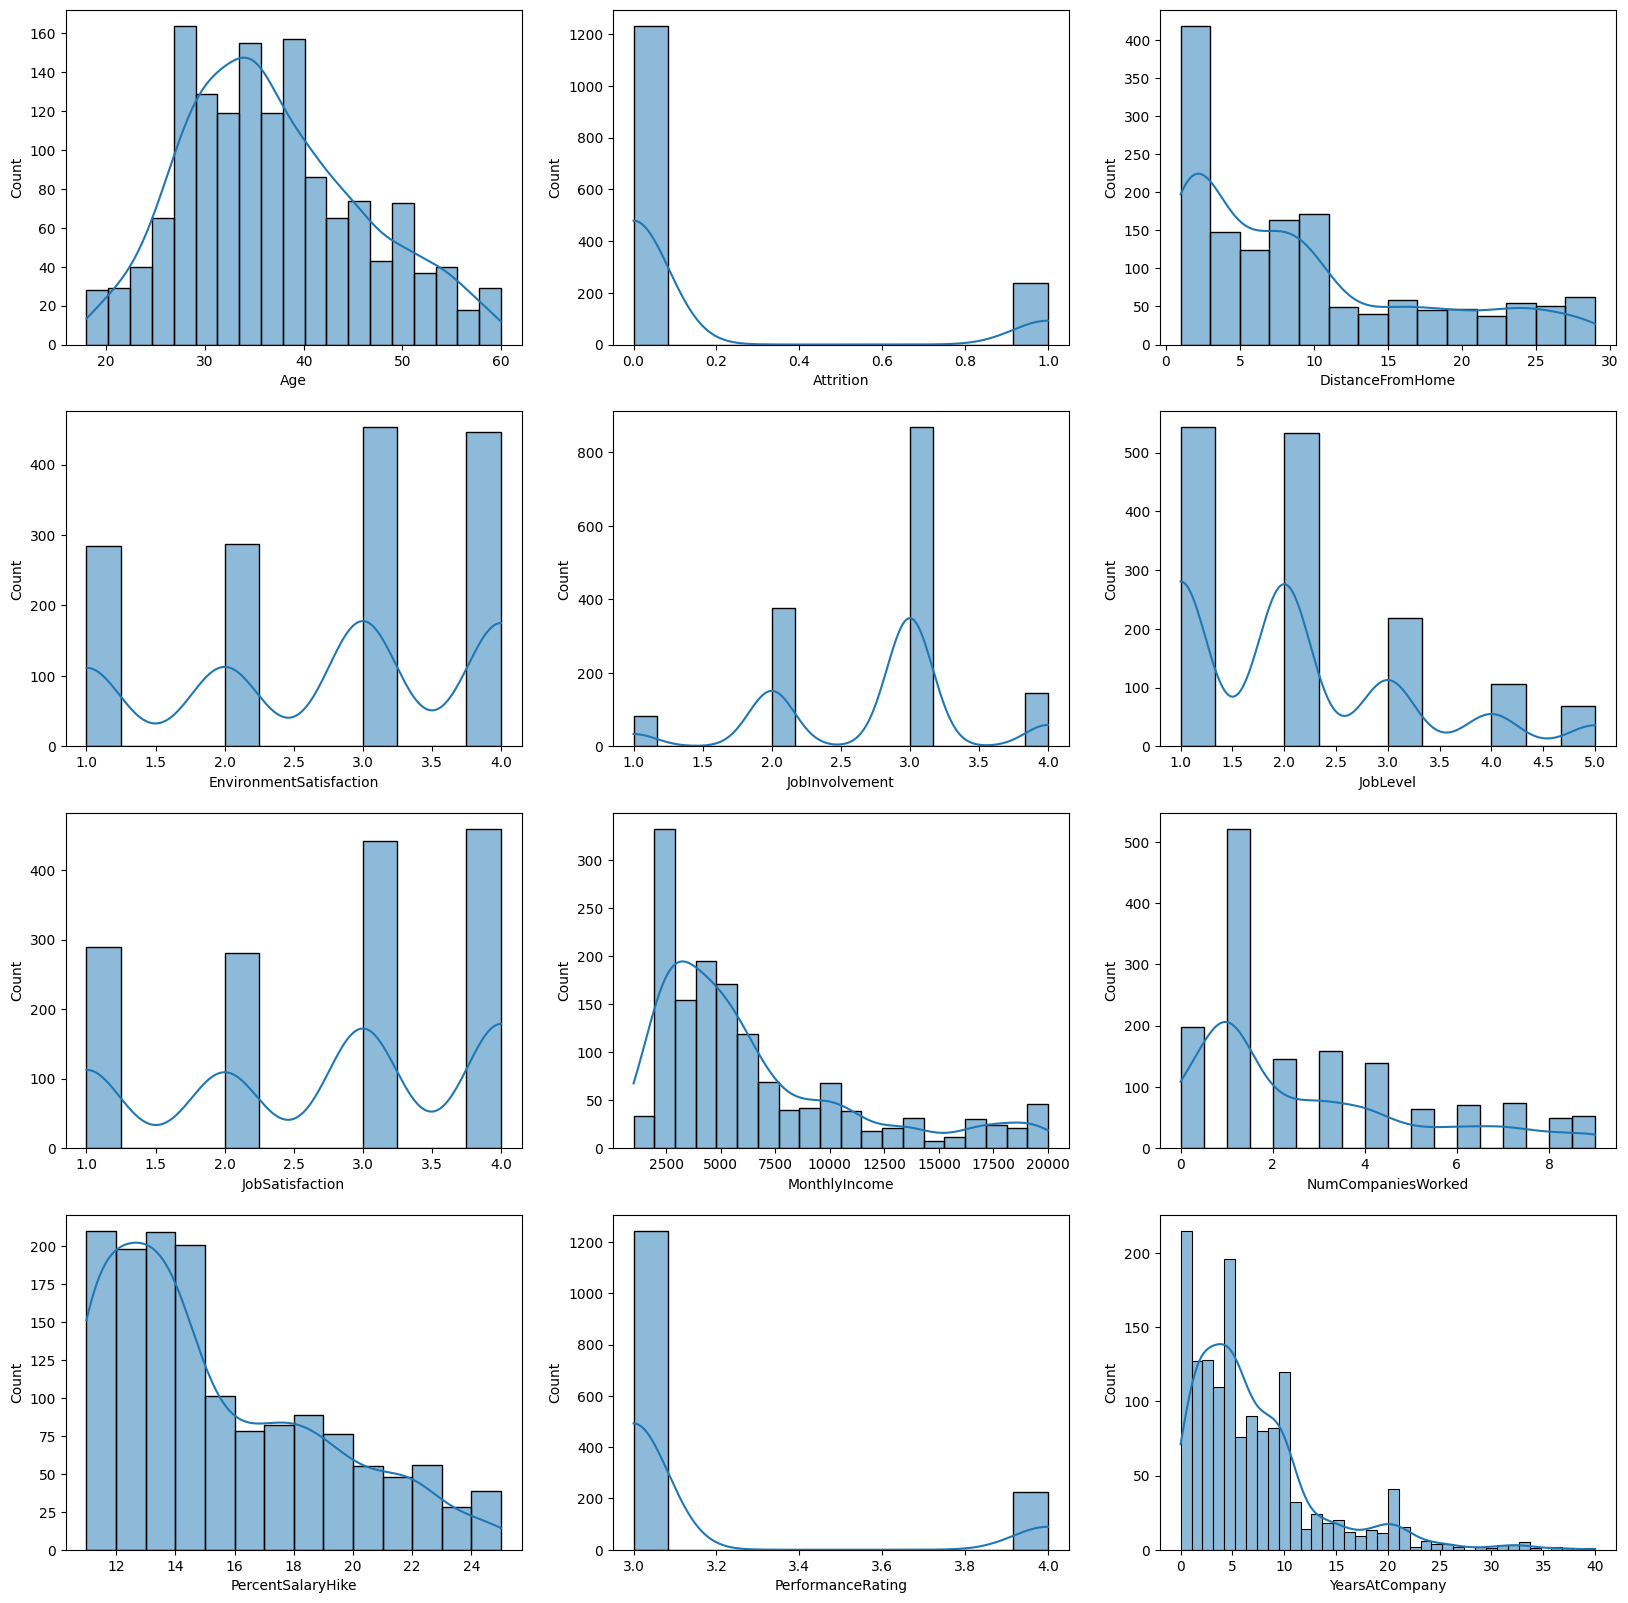

In [189]:
plt.figure(figsize =[20,20])
i = 1
for col in df_num:
    ax = plt.subplot(4,3,i)
    sns.histplot(df_num[col] , kde = True)
    i = i+1

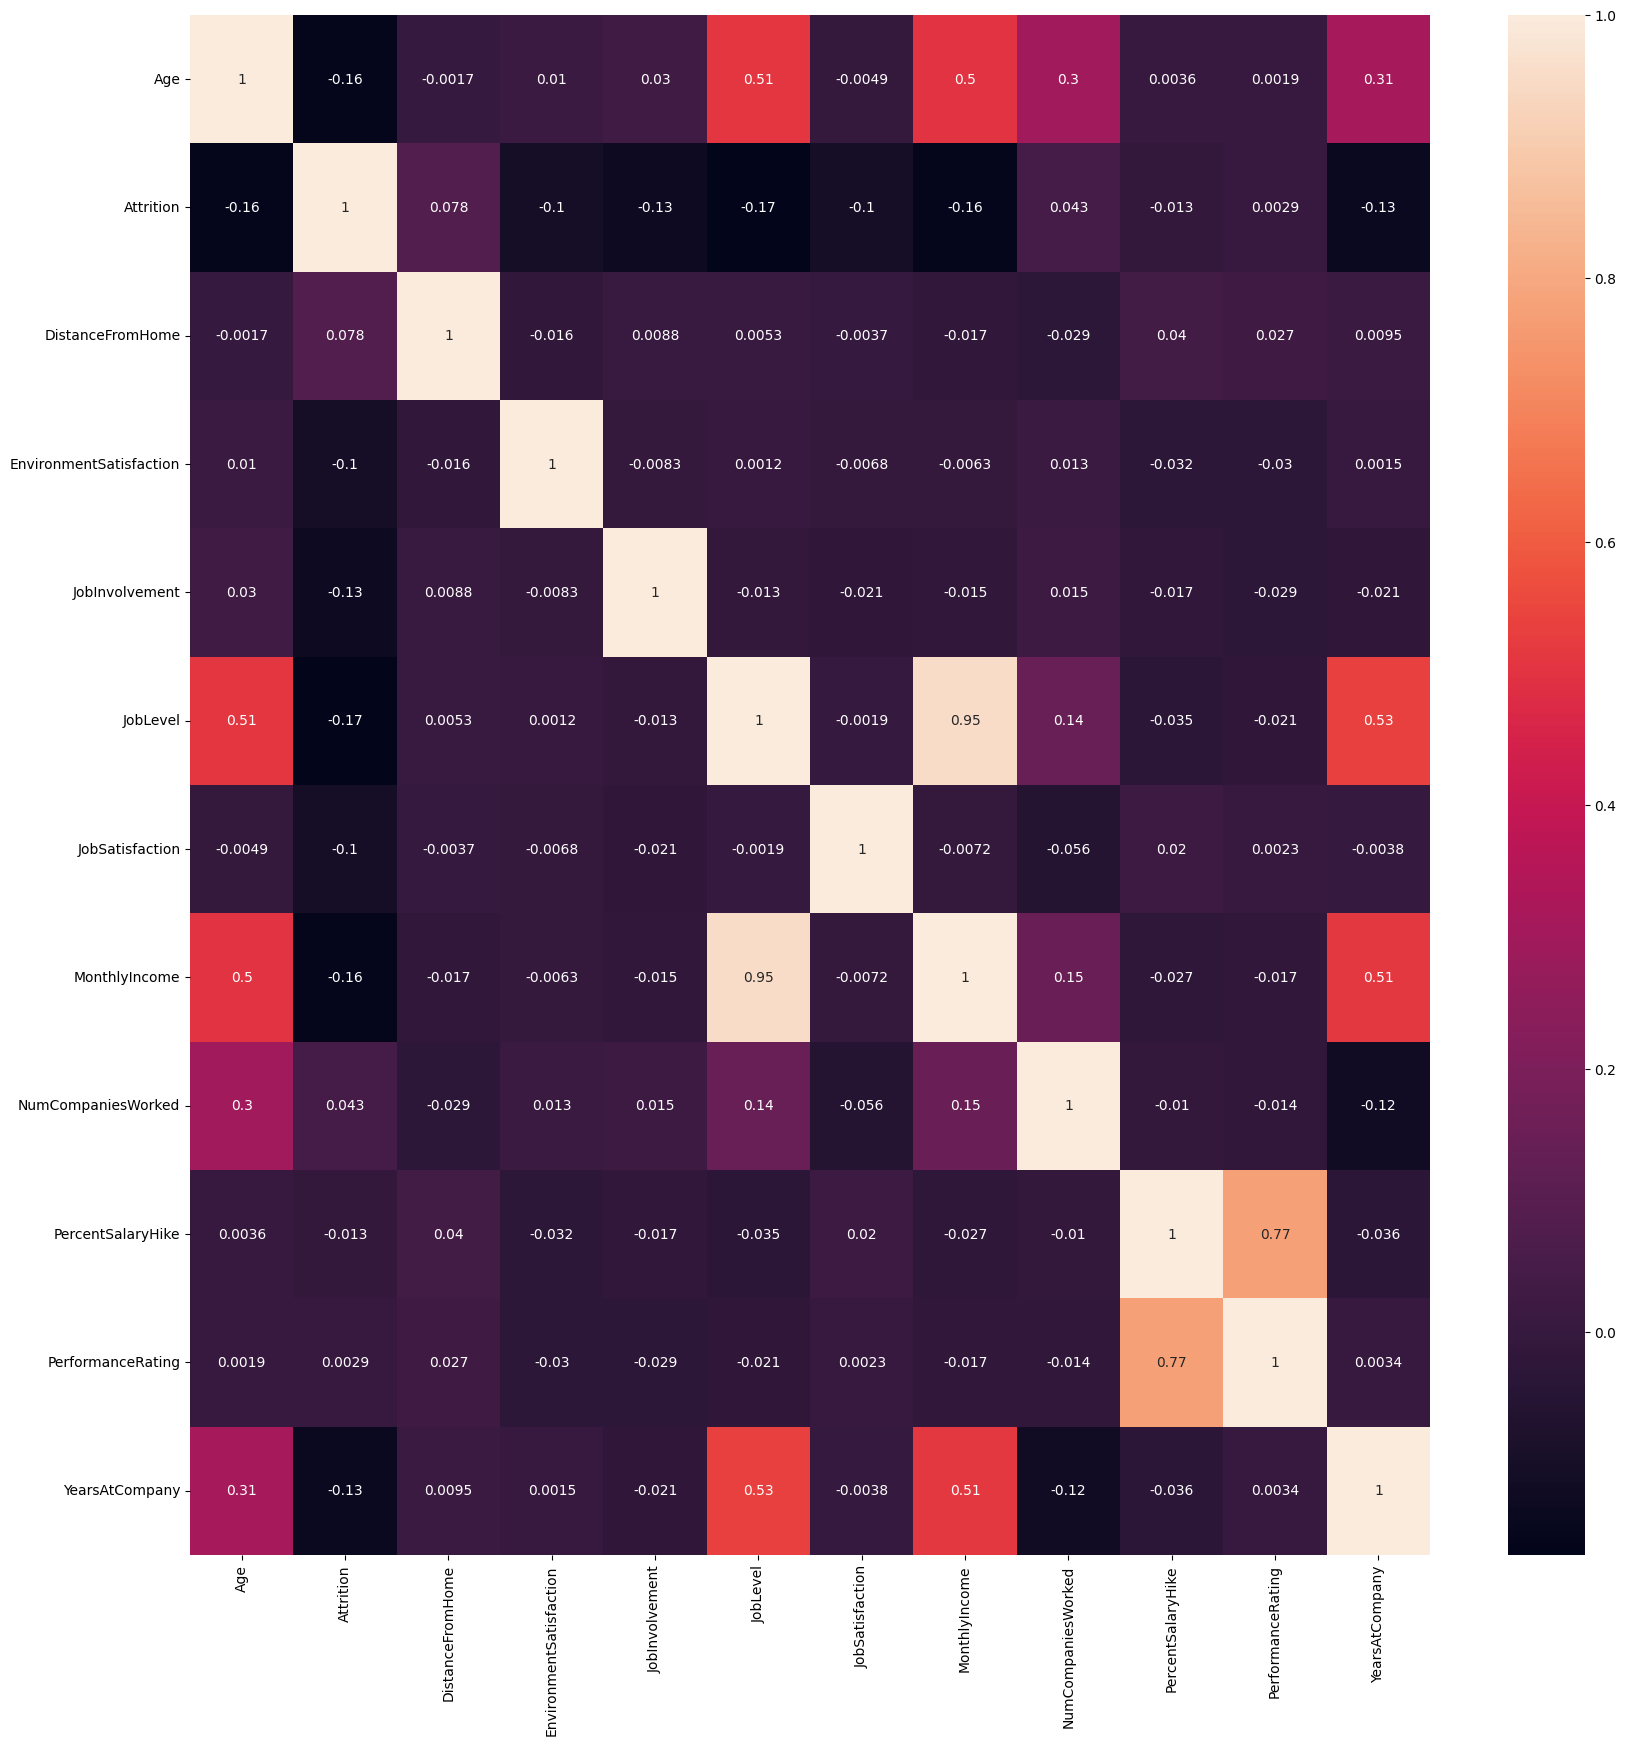

In [190]:
plt.figure(figsize =[20,20])
corr_matrix = df_num.corr()
sns.heatmap(corr_matrix, annot = True)
plt.show()

In [191]:
df_employee = pd.get_dummies(data=df_employee,columns=cat_cols,drop_first=True)
df_employee.head()

,Age,Attrition,DistanceFromHome,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,...,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,OverTime_Yes
0,41,1,1,2,3,2,4,5993,8,11,...,0,0,0,0,0,0,0,1,0,1
1,49,0,8,3,2,2,2,5130,1,23,...,1,0,0,0,0,0,1,0,0,0
2,37,1,2,4,2,1,3,2090,6,15,...,1,0,1,0,0,0,0,0,0,1
3,33,0,3,4,3,1,3,2909,1,11,...,0,0,0,0,0,0,1,0,0,1
4,27,0,2,1,3,1,2,3468,9,12,...,1,0,1,0,0,0,0,0,0,0


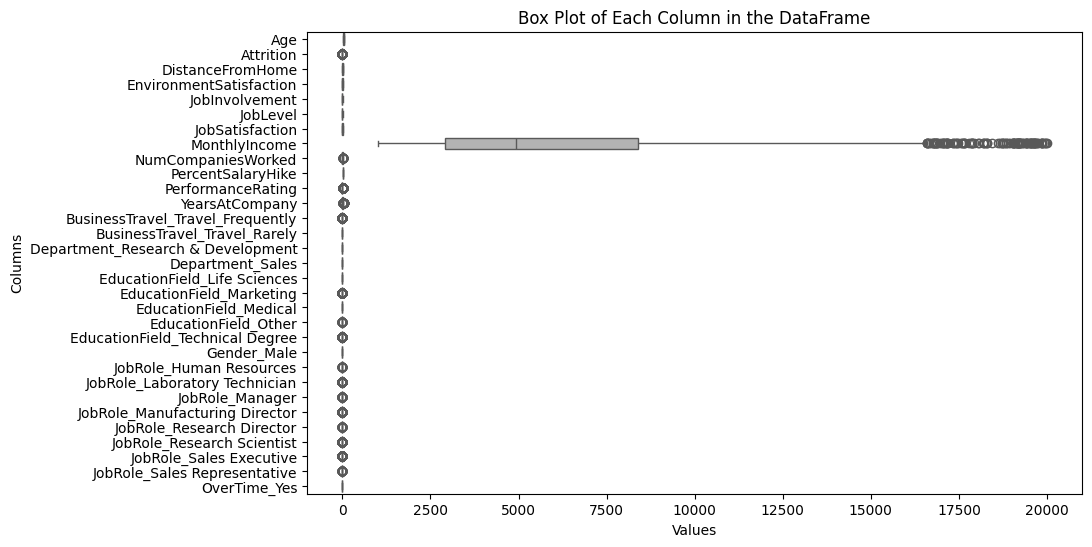

In [192]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_employee, orient='h', palette="Set2")
plt.title('Box Plot of Each Column in the DataFrame')
plt.xlabel('Values')
plt.ylabel('Columns')
plt.show()

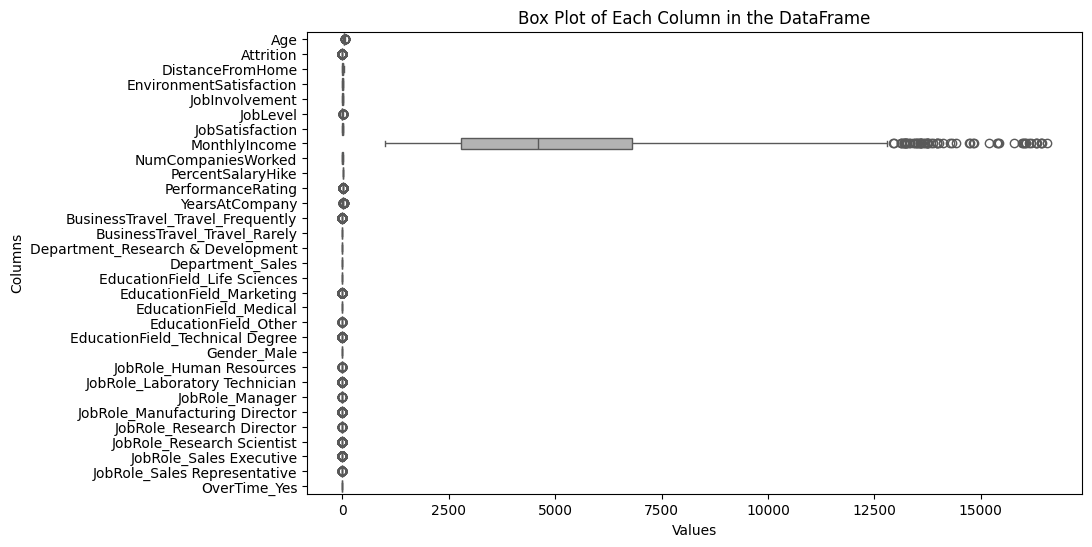

In [193]:
df = remove_outliers(df_employee,['MonthlyIncome','NumCompaniesWorked'])

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, orient='h', palette="Set2")
plt.title('Box Plot of Each Column in the DataFrame')
plt.xlabel('Values')
plt.ylabel('Columns')
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Write a code to deal with the imbalanced dataset.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [194]:
# type your code here
df.Attrition.unique()

array([1, 0], dtype=int64)

<Axes: xlabel='Attrition', ylabel='count'>

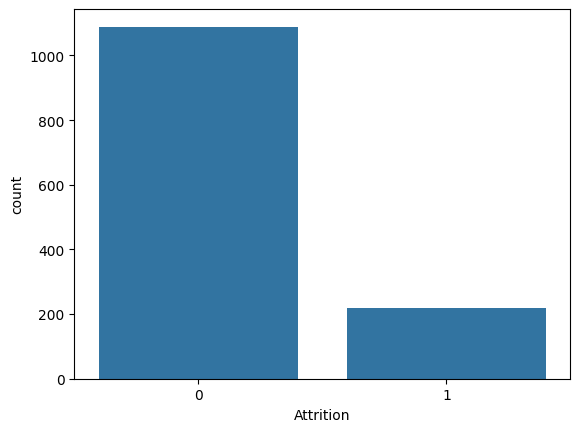

In [195]:
sns.countplot(x='Attrition', data=df)

In [196]:
X = df.drop(columns = ['Attrition','JobLevel'], axis=1)  # Adjust 'target' with the name of your target variable
y = df['Attrition']

# Apply SMOTE over-sampling
smote = SMOTE(random_state=2)
X, y = smote.fit_resample(X, y)

In [197]:
labels = y.index.astype(str)
y.value_counts()

1    1089
0    1089
Name: Attrition, dtype: int64

### Let's begin with some hands-on practice exercises

<a id="dtree"> </a>
## 1. Decision tree

## We shall use the employee dataset

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Build a model to predict whether or not an employee will leave the company based on employee's environment satisfaction and monthly income. Calculate the accuracy for the model.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [198]:
X1 = X[['EnvironmentSatisfaction', 'MonthlyIncome']]

In [199]:
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)

In [200]:
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [201]:
# Make predictions on the test set
y_pred = decision_tree.predict(X_test)

In [202]:
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of the Decision Tree model: {accuracy:.2f}')

Accuracy of the Decision Tree model: 0.74


In [203]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.73      0.73       212
           1       0.74      0.75      0.74       224

    accuracy                           0.74       436
   macro avg       0.74      0.74      0.74       436
weighted avg       0.74      0.74      0.74       436



<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Build a full model to predict if an employee will leave the company. Find three features that impact the model prediction the most.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [204]:
# type your code here
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

y_pred = decision_tree.predict_proba(X_test)[:,1]

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of the Decision Tree model: {accuracy:.2f}')

Accuracy of the Decision Tree model: 0.83


In [205]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.81      0.82       212
           1       0.82      0.85      0.84       224

    accuracy                           0.83       436
   macro avg       0.83      0.83      0.83       436
weighted avg       0.83      0.83      0.83       436



<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4.  Find the area under the receiver operating characteristic curve for full model built in question 3. </b>
                </font>
            </div>
        </td>
    </tr>
</table>

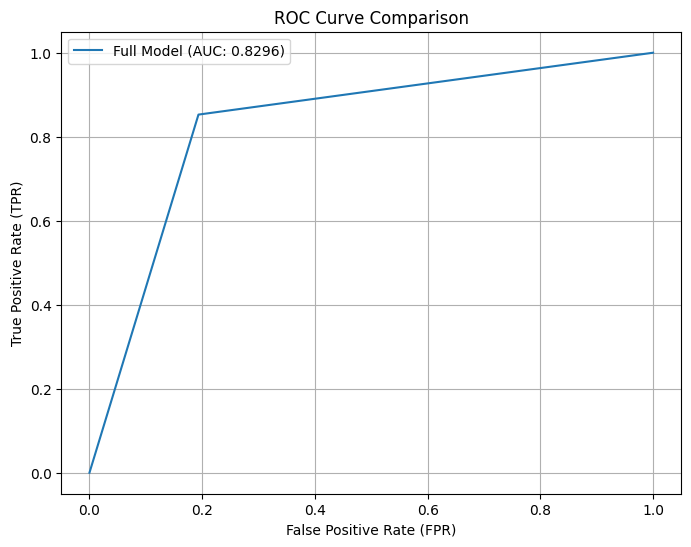

In [206]:
# type your code here
fpr, tpr , thresholds = roc_curve(y_test.values, y_pred)

# Calculate AUC scores
auc = roc_auc_score(y_test,y_pred)

# Plot the ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Full Model (AUC: {:.4f})'.format(auc))
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve Comparison')
plt.legend()
plt.grid(True)
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Plot a confusion matrix for the full model built in Q3.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

<Axes: >

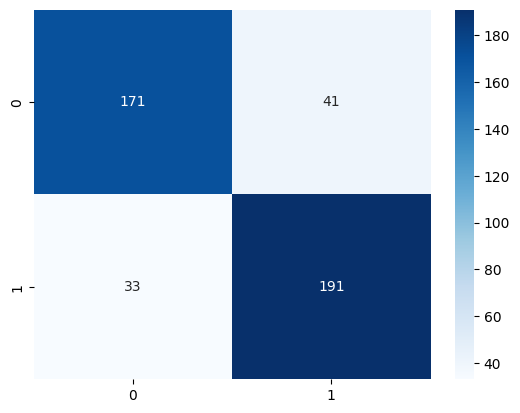

In [207]:
# type your code here
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. Calculate the specificity, sensitivity, % of misclassified and correctly classified observations. What can you say about the model by looking at the sensitivity and specificity values? Is this a good model?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [208]:
# type your code here
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.81      0.82       212
           1       0.82      0.85      0.84       224

    accuracy                           0.83       436
   macro avg       0.83      0.83      0.83       436
weighted avg       0.83      0.83      0.83       436



In [209]:
specificity = []
sensitivity = []

for i in range(len(cm)):
    tn = cm.sum() - (cm[i, :].sum() + cm[:, i].sum() - cm[i, i])
    fp = cm[:, i].sum() - cm[i, i]
    fn = cm[i, :].sum() - cm[i, i]
    tp = cm[i, i]
    
    specificity.append(tn / (tn + fp))
    sensitivity.append(tp / (tp + fn))

# Overall accuracy
accuracy = accuracy_score(y_test, y_pred)

# Percentage of misclassified and correctly classified observations
misclassified_percentage = (1 - accuracy) * 100
correctly_classified_percentage = accuracy * 100

print(f"Specificity: {specificity}")
print(f"Sensitivity: {sensitivity}")
print(f"Misclassified Percentage: {misclassified_percentage:.2f}%")
print(f"Correctly Classified Percentage: {correctly_classified_percentage:.2f}%")

Specificity: [0.8526785714285714, 0.8066037735849056]
Sensitivity: [0.8066037735849056, 0.8526785714285714]
Misclassified Percentage: 16.97%
Correctly Classified Percentage: 83.03%


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Build and plot a decision tree with maximum 5 terminal nodes.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [210]:
clf = DecisionTreeClassifier(max_leaf_nodes=5, random_state=42)
clf.fit(X, y)

DecisionTreeClassifier(max_leaf_nodes=5, random_state=42)

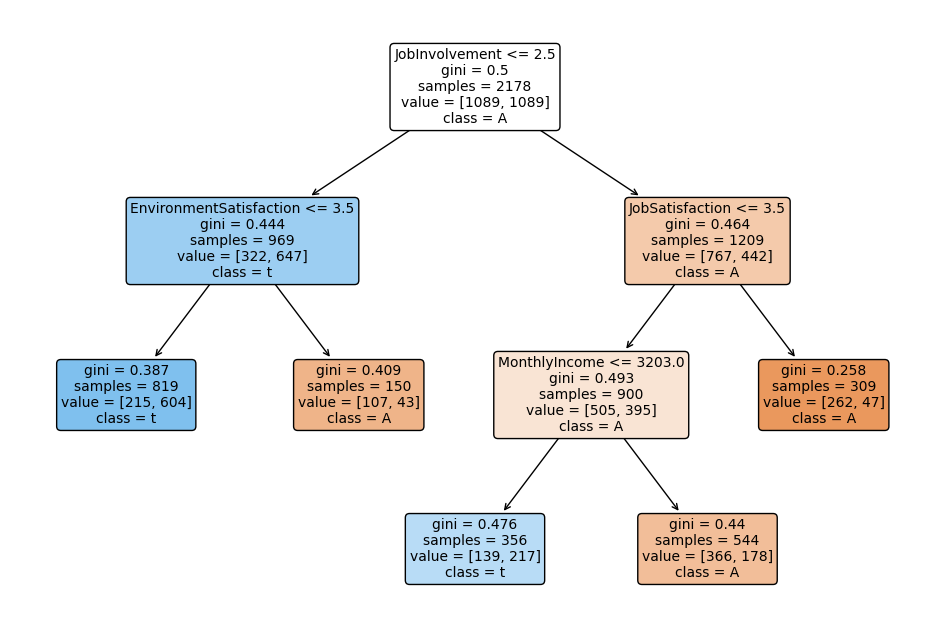

In [211]:
plt.figure(figsize=(12, 8))
tree.plot_tree(clf, filled=True, feature_names=X.columns, class_names='Attrition', rounded=True)
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Build a Decision Tree model with the predefined parameters and find the average accuracy by performing the 10 fold cross validation.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [212]:
# type your code here

clf = DecisionTreeClassifier(random_state=42)

# Define the parameter grid
param_grid = {
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_leaf_nodes': [5, 10, 20, None],
    'criterion': ['gini', 'entropy']
}

# Perform Grid Search with 10-fold cross-validation
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=10, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Cross-Validation Accuracy: {grid_search.best_score_:.2f}")

Best Parameters: {'criterion': 'gini', 'max_depth': None, 'max_leaf_nodes': None, 'min_samples_leaf': 2, 'min_samples_split': 10}
Best Cross-Validation Accuracy: 0.82


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. For a decision tree model, find the best value of hyperparameters "criterion", "max_depth", and "min_samples_split".</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [213]:
# type your code here
clf = DecisionTreeClassifier(random_state=42)

# Define the parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7,9,11, None],
    'min_samples_split': [2, 5, 10,12,15,16]
}

# Perform Grid Search with 10-fold cross-validation
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=10, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Cross-Validation Accuracy: {grid_search.best_score_:.2f}")

Best Parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 15}
Best Cross-Validation Accuracy: 0.82


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                        <b>10. Build a decision tree model using the tuned hyperparameters, perform 10 fold cross validation and get the average ROC-AUC score.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [214]:
tuned_params = {
    'max_depth': [3, 5, 7],  # Example values for max_depth
    'min_samples_split': [2, 5, 10],  # Example values for min_samples_split
    'min_samples_leaf': [1, 2, 4]  # Example values for min_samples_leaf
}
# Create the Decision Tree model with tuned hyperparameters
dt_clf = DecisionTreeClassifier()

# Perform GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(dt_clf, param_grid=tuned_params, cv=10, scoring='roc_auc')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Create the Decision Tree model with the best hyperparameters
dt_clf_best = DecisionTreeClassifier(**best_params)

# Perform 10-fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)
roc_auc_scores = cross_val_score(dt_clf_best, X_train,y_train, cv=kf, scoring='roc_auc')

# Calculate the average ROC-AUC score
average_roc_auc = roc_auc_scores.mean()

print("Average ROC-AUC score:", average_roc_auc)

<IPython.core.display.Javascript object>

Average ROC-AUC score: 0.8576885560296665


In [215]:
dt_clf_best.fit(X_train, y_train)
y_probs = dt_clf_best.predict_proba(X_test)[:,1]

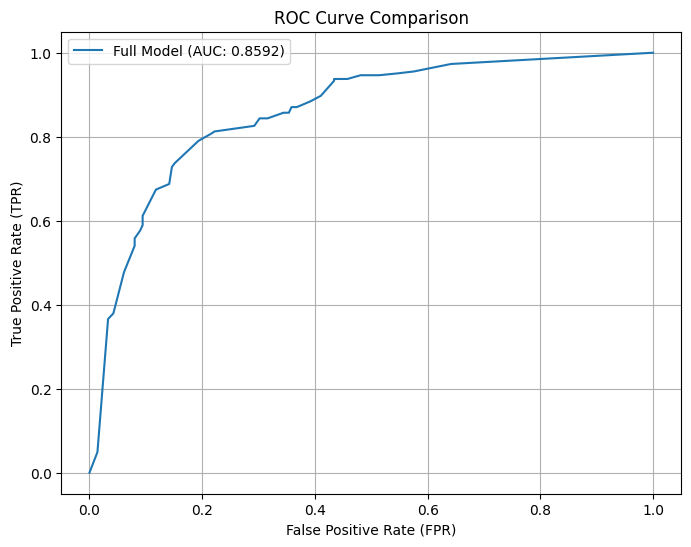

In [216]:


fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Calculate AUC scores
auc_full = roc_auc_score(y_test,y_probs)

# Plot the ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Full Model (AUC: {:.4f})'.format(auc_full))
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve Comparison')
plt.legend()
plt.grid(True)
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>11. Build 5 decision trees each with random 20 features. Also predict the attrition for test set for each model.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [217]:
X = df.drop(columns=['Attrition'])  # Features
y = df['Attrition']  # Target

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build 5 decision trees each with random 20 features
for i in range(5):
    # Randomly select 20 features
    random_features = X_train.sample(n=20, axis=1, random_state=i)
    
    # Train a decision tree model using the selected features
    dt_clf = DecisionTreeClassifier(random_state=42)
    dt_clf.fit(random_features, y_train)
    
    # Predict attrition for the test set
    y_pred = dt_clf.predict(X_test[random_features.columns])
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Model {i+1} Accuracy: {accuracy:.2f}")

Model 1 Accuracy: 0.77
Model 2 Accuracy: 0.69
Model 3 Accuracy: 0.76
Model 4 Accuracy: 0.75
Model 5 Accuracy: 0.77


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>12. Create a new dataframe "model_predictions_df" by appending each prediction made in question 8. There will be 5 columns in the dataframe for each prediction using the decision tree models built in above question.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [218]:
X = df.drop(columns=['Attrition'])  # Features
y = df['Attrition']  # Target

# Split the data into train and test sets
X_train, X_test, _, _ = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an empty DataFrame to store the predictions
model_predictions_df = pd.DataFrame()

# Build 5 decision trees each with random 20 features
for i in range(5):
    # Randomly select 20 features
    random_features = X_train.sample(n=20, axis=1, random_state=i)
    
    # Create a decision tree model using the selected features
    dt_clf = DecisionTreeClassifier(random_state=42)
    dt_clf.fit(random_features, y_train)
    
    # Predict attrition for the test set using the model
    predictions = dt_clf.predict(X_test[random_features.columns])
    
    # Add predictions to the DataFrame with a column name indicating the model number
    model_predictions_df[f'Model_{i+1}_Predictions'] = predictions

# Display the DataFrame
model_predictions_df

,Model_1_Predictions,Model_2_Predictions,Model_3_Predictions,Model_4_Predictions,Model_5_Predictions
0,0,0,0,0,0
1,1,0,0,1,0
2,0,0,1,0,0
3,0,0,0,0,0
4,0,0,0,0,0
...,...,...,...,...,...
257,0,1,0,1,0
258,0,1,0,0,1
259,1,0,0,0,0
260,0,0,0,0,1


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>13. Create a new column "Voted_Result" in the dataframe "model_predictions_df" that contains the maximum occuring value (mode) of the 5 columns in the dataframe (row-wise).<br></b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [219]:
# Calculate the mode (most frequent value) along each row
model_predictions_df['Voted_Result'] = model_predictions_df.mode(axis=1)[0]

# Display the updated DataFrame
model_predictions_df

,Model_1_Predictions,Model_2_Predictions,Model_3_Predictions,Model_4_Predictions,Model_5_Predictions,Voted_Result
0,0,0,0,0,0,0
1,1,0,0,1,0,0
2,0,0,1,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
257,0,1,0,1,0,0
258,0,1,0,0,1,0
259,1,0,0,0,0,0
260,0,0,0,0,1,0


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>14. Consider the values of "Voted_Result" as our new predictions and store its values in a variable "new_y_pred" and find the accuracy and the roc-auc score using new_y_pred.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [220]:
from sklearn.metrics import accuracy_score, roc_auc_score

# Extract values of "Voted_Result" column and store them in new_y_pred
new_y_pred = model_predictions_df['Voted_Result']

# Calculate accuracy using new_y_pred compared to the actual target variable y_test
accuracy = accuracy_score(y_test, new_y_pred)

# Calculate ROC-AUC score using new_y_pred compared to the actual target variable y_test
roc_auc = roc_auc_score(y_test, new_y_pred)

print("Accuracy using Voted_Result:", accuracy)
print("ROC-AUC score using Voted_Result:", roc_auc)

Accuracy using Voted_Result: 0.8129770992366412
ROC-AUC score using Voted_Result: 0.5610597854943188


<a id="rf"> </a>
## 2. Random Forest

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>15. Build a random forest full model to predict if an employee will leave the company or not and generate a classification report.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [232]:
X = df_employee.drop(columns=['Attrition'])  # Features
y = df_employee['Attrition']  # Target

smote = SMOTE(random_state=2)
X, y = smote.fit_resample(X, y)

# Split the dataset into training and testing sets
# You can adjust the test_size and random_state parameters as needed
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest model
# You can adjust the parameters of RandomForestClassifier as needed
rf_model = RandomForestClassifier(random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_model.predict(X_test)

# Generate a classification report
classification_rep = classification_report(y_test, y_pred)

print("Classification Report:")
print(classification_rep)

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.95      0.92       250
           1       0.94      0.88      0.91       244

    accuracy                           0.91       494
   macro avg       0.92      0.91      0.91       494
weighted avg       0.92      0.91      0.91       494



<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>16. For a random forest model, find the best value of hyperparameters "n_estimators", "criterion", "max_depth", and "min_samples_split".</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [233]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters grid
param_grid = {
    'n_estimators': [50, 100, 150],  # Number of trees in the forest
    'criterion': ['gini', 'entropy'],  # Criterion for splitting
    'max_depth': [None, 5, 10],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10]  # Minimum number of samples required to split a node
}

# Create a Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

print("Best Hyperparameters:")
print(best_params)


Best Hyperparameters:
{'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>17. Build a random forest model using the tuned hyperparameters, perform 10 fold cross validation and get the average ROC-AUC score.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [234]:
# Use the best hyperparameters obtained from the grid search
best_params = grid_search.best_params_

# Create a Random Forest model using the best hyperparameters
rf_model_tuned = RandomForestClassifier(
    n_estimators=best_params['n_estimators'],
    criterion=best_params['criterion'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    random_state=42
)

# Perform 10-fold cross-validation and calculate ROC-AUC scores
cv_scores = cross_val_score(rf_model_tuned, X_train, y_train, cv=10, scoring=make_scorer(roc_auc_score))

# Calculate the average ROC-AUC score
average_roc_auc = cv_scores.mean()

print("Average ROC-AUC score from 10-fold cross-validation:", average_roc_auc)

<IPython.core.display.Javascript object>

Average ROC-AUC score from 10-fold cross-validation: 0.896624407338693


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>18. Using the tuned random forest model, find the features that impact the model prediction the most.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

                              Feature  Importance
6                       MonthlyIncome    0.112977
10                     YearsAtCompany    0.076073
0                                 Age    0.067900
3                      JobInvolvement    0.067342
1                    DistanceFromHome    0.065580
5                     JobSatisfaction    0.064912
2             EnvironmentSatisfaction    0.055939
13  Department_Research & Development    0.051499
17             EducationField_Medical    0.048673
7                  NumCompaniesWorked    0.045268
8                   PercentSalaryHike    0.044306
15       EducationField_Life Sciences    0.036775
4                            JobLevel    0.036221
12       BusinessTravel_Travel_Rarely    0.031524
14                   Department_Sales    0.023230
29                       OverTime_Yes    0.020516
20                        Gender_Male    0.018181
26         JobRole_Research Scientist    0.017649
16           EducationField_Marketing    0.015563


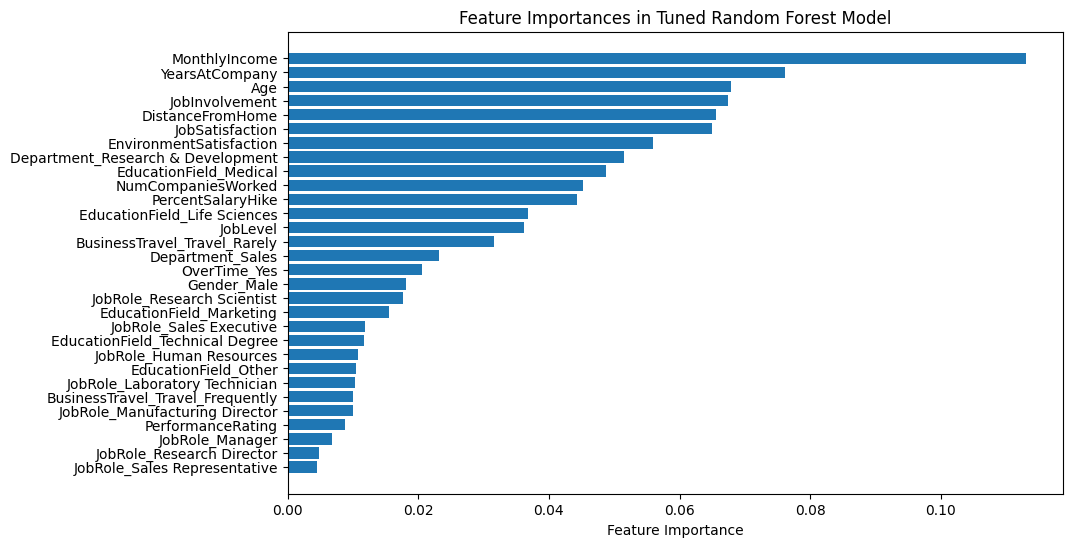

In [235]:
rf_model_tuned.fit(X_train, y_train)

feature_importances = rf_model_tuned.feature_importances_

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sort the DataFrame by feature importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importances
print(feature_importance_df)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.gca().invert_yaxis()  # Highest importance at the top
plt.xlabel('Feature Importance')
plt.title('Feature Importances in Tuned Random Forest Model')
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>19. Build a random forest model using the top 10 most important features.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [236]:
top_10_features = feature_importance_df.head(10)['Feature']

# Create new training and testing sets using only the top 10 features
X_train_top10 = X_train[top_10_features]
X_test_top10 = X_test[top_10_features]

# Create and train the Random Forest model using the best hyperparameters and the top 10 features
rf_model_top10 = RandomForestClassifier(
    n_estimators=best_params['n_estimators'],
    criterion=best_params['criterion'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    random_state=42
)
rf_model_top10.fit(X_train_top10, y_train)

# Make predictions on the test set
y_pred_top10 = rf_model_top10.predict(X_test_top10)
y_prob_top10 = rf_model_top10.predict_proba(X_test_top10)[:, 1]

# Evaluate the model
accuracy_top10 = accuracy_score(y_test, y_pred_top10)
roc_auc_top10 = roc_auc_score(y_test, y_prob_top10)
classification_rep_top10 = classification_report(y_test, y_pred_top10)

print("Accuracy using top 10 features:", accuracy_top10)
print("ROC-AUC score using top 10 features:", roc_auc_top10)
print("Classification Report using top 10 features:")
print(classification_rep_top10)

Accuracy using top 10 features: 0.8805668016194332
ROC-AUC score using top 10 features: 0.9415409836065574
Classification Report using top 10 features:
              precision    recall  f1-score   support

           0       0.88      0.89      0.88       250
           1       0.88      0.87      0.88       244

    accuracy                           0.88       494
   macro avg       0.88      0.88      0.88       494
weighted avg       0.88      0.88      0.88       494



<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>20. Plot a confusion matrix and area under the receiver operating characteristic curve for the model built in question 19. </b>
                </font>
            </div>
        </td>
    </tr>
</table>

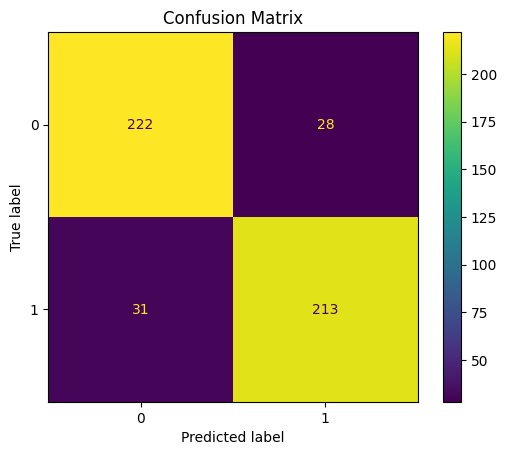

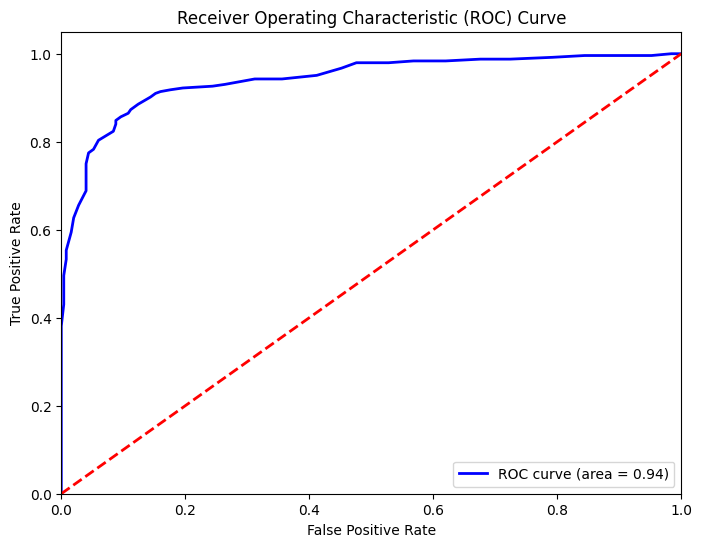

In [237]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc, ConfusionMatrixDisplay, RocCurveDisplay

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_top10)

# Plot confusion matrix
ConfusionMatrixDisplay(confusion_matrix=conf_matrix).plot()
plt.title('Confusion Matrix')
plt.show()

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob_top10)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
